# Importando Nomes

In [1]:
# importando os pacotes necessarios

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# importando os dados de um arquivo json femininos
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=9999999&sexo=f")
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
72810,ZNILDA,0,20,72609,F
72811,ZONAIRA,0,20,71720,F
72812,ZORETE,0,20,72646,F
72813,ZULEINA,0,20,71478,F


In [3]:
# importando os dados de um arquivo json masculinos
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=9999999&sexo=m")
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
63453,ZIZA,0,20,61482,M
63454,ZIZITO,0,20,63394,M
63455,ZOELIO,0,20,62029,M
63456,ZORAIDO,0,20,63415,M


In [4]:
# pegando alguns nomes de forma aleatorioa

nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
39707,MAURISEIA,0,47,39667,F
43760,NAYELEN,0,41,43510,F
31040,LAURINTINA,0,67,30929,F
10102,JOANEIDE,0,332,10099,F
37694,THIALLY,0,51,37308,F


In [5]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 136273


In [6]:
# unificando as bases 

frames = [nomes_m, nomes_f]
frames

[            nome  regiao     freq   rank sexo
 0           JOSE       0  5732508      1    M
 1           JOAO       0  2971935      2    M
 2        ANTONIO       0  2567494      3    M
 3      FRANCISCO       0  1765197      4    M
 4         CARLOS       0  1483121      5    M
 ...          ...     ...      ...    ...  ...
 63453       ZIZA       0       20  61482    M
 63454     ZIZITO       0       20  63394    M
 63455     ZOELIO       0       20  62029    M
 63456    ZORAIDO       0       20  63415    M
 63457     ZUPERO       0       20  61804    M
 
 [63458 rows x 5 columns],
             nome  regiao      freq   rank sexo
 0          MARIA       0  11694738      1    F
 1            ANA       0   3079729      2    F
 2      FRANCISCA       0    721637      3    F
 3        ANTONIA       0    588783      4    F
 4        ADRIANA       0    565621      5    F
 ...          ...     ...       ...    ...  ...
 72810     ZNILDA       0        20  72609    F
 72811    ZONAIRA      

In [7]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
19111,ELIE
63890,SILVAALINE
57270,NIUARA
39301,THALISA
69172,IVANEDI


# Incluindo ID dos alunos

In [8]:
# gerando numeros aleatorios
np.random.seed(123)

In [9]:
# contando o numero de alunos para receber os IDs

total_aluno = len(nomes)
total_aluno

136273

In [10]:
# incluindo a coluna ID alunos no DataFrame

nomes['ID'] = np.random.permutation(total_aluno) + 1

In [11]:
# checando os ID com amostra

nomes.sample(5)

,nome,ID
65439,MARISITA,61790
55698,LUSIMARI,126389
16219,KERLLY,93057
3068,ELIARA,129055
16001,WILIAMIS,13233


In [12]:
# gerando um falso domino de email

dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_aluno)
nomes.sample(5)

,nome,ID,dominio
14108,VERLI,72821,@servicodoemail.com
49516,EMANIELE,12609,@servicodoemail.com
8265,FRANKI,20443,@servicodoemail.com
52545,CAEOLINA,119255,@dominiodoemail.com.br
12342,TAISLENE,7372,@dominiodoemail.com.br


In [13]:
# criando coluna de e-mails

nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()
nomes.sample(5)

,nome,ID,dominio,email
36282,GEILTO,74548,@dominiodoemail.com.br,geilto@dominiodoemail.com.br
17439,WIGNO,43249,@servicodoemail.com,wigno@servicodoemail.com
60132,MARIELLEM,75443,@servicodoemail.com,mariellem@servicodoemail.com
30180,INDIANO,76368,@servicodoemail.com,indiano@servicodoemail.com
5559,RENEN,4905,@dominiodoemail.com.br,renen@dominiodoemail.com.br


# Criando a tabela Cursos

In [14]:
# instalando os pacotes necessarios

!pip install html5lib
!pip install lxml

In [15]:
# importando os pacotes necessarios 
import html5lib

In [16]:
# atribuindo o endereço a uma variavel

url =  'http://tabela-cursos.herokuapp.com/index.html'

In [17]:
# atribuindo a lista a uma variavel
cursos = pd.read_html(url)

# transformando cursos em DataFrame de uma forma diferente
cursos = cursos[0]
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [18]:
# verificando o cabeçalho
cursos.head(3)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web


# Alterando o index e o titulo da coluna

In [19]:
# modificando o nome da coluna para facilitar manuseio
cursos = cursos.rename(columns = {'Nome do curso' : 'nome_do_curso'})
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [20]:
# criando coluna id
cursos['id'] = cursos.index + 1
cursos.head(2)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2


In [21]:
# atribuindo o id ao index do dataframe

cursos = cursos.set_index('id')
cursos.head(2)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web


In [22]:
nomes.sample(5)

,nome,ID,dominio,email
5690,FRANCINEUDA,126242,@servicodoemail.com,francineuda@servicodoemail.com
47711,INIDE,114066,@dominiodoemail.com.br,inide@dominiodoemail.com.br
23637,RHAIRA,133975,@servicodoemail.com,rhaira@servicodoemail.com
13487,OLNEI,114408,@dominiodoemail.com.br,olnei@dominiodoemail.com.br
66346,CLAIENE,108341,@servicodoemail.com,claiene@servicodoemail.com


# Matriculando os alunos nos cursos 

In [29]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_aluno) * 1.02).astype(int)
nomes.sample(3)

,nome,ID,dominio,email,matriculas
12360,ACI,95523,@dominiodoemail.com.br,aci@dominiodoemail.com.br,1
46207,ZILDINEI,123190,@servicodoemail.com,zildinei@servicodoemail.com,2
21228,LYSANDRA,90701,@dominiodoemail.com.br,lysandra@dominiodoemail.com.br,1


In [30]:
# Avaliando estatistica básica 
nomes.matriculas.describe()

count    136273.000000
mean          1.596831
std           0.976936
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          13.000000
Name: matriculas, dtype: float64

C:\Users\lucas\.conda\envs\lucas_pandas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

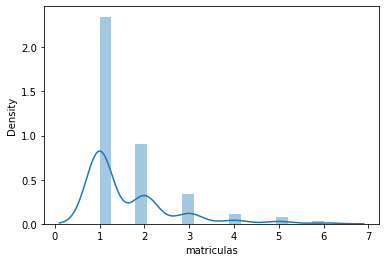

In [34]:
# plotando histograma

sns.distplot(nomes.matriculas[0:400])

In [35]:
# quantas matriculas temos para cada aluno? 

nomes.matriculas.value_counts()

1     85355
2     31854
3     11979
4      4443
5      1652
6       585
7       259
8        91
9        36
10       14
11        3
12        1
13        1
Name: matriculas, dtype: int64

# Selecionando cursos

In [37]:
nomes.sample(3)

,nome,ID,dominio,email,matriculas
46186,PAMELI,53039,@servicodoemail.com,pameli@servicodoemail.com,1
3234,EMANUELLA,56559,@dominiodoemail.com.br,emanuella@dominiodoemail.com.br,1
26075,ELQUER,11986,@dominiodoemail.com.br,elquer@dominiodoemail.com.br,1


In [39]:
# criando variaveis de apoio

todas_matriculas = []
x  = np.random.rand(20)
prob = x / sum(x)

In [42]:
# buscando e atribuindo de forma aleatorio os cursos

for index, row in nomes.iterrows():
    id  = row.ID
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns = ['ID', 'id_curso'])

In [44]:
matriculas.head(10)

,ID,id_curso
0,69752,19
1,134535,3
2,62972,1
3,19630,8
4,124583,9
5,2238,18
6,117871,13
7,125878,4
8,125878,9
9,55469,9


In [52]:
# agrupando matriculas

matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'ID' : 'quantidade_de_alunos'})

In [49]:
# datasets criados
nomes.sample(3)

,nome,ID,dominio,email,matriculas
46316,AREMIR,72627,@dominiodoemail.com.br,aremir@dominiodoemail.com.br,1
47377,AGENITO,7121,@dominiodoemail.com.br,agenito@dominiodoemail.com.br,1
27015,NORDELIO,132638,@dominiodoemail.com.br,nordelio@dominiodoemail.com.br,1


In [55]:
# datasets criados
cursos.head(10)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [51]:
# datasets criados
matriculas

,ID,id_curso
0,69752,19
1,134535,3
2,62972,1
3,19630,8
4,124583,9
...,...,...
217600,15726,7
217601,15726,9
217602,15726,6
217603,15726,7


In [54]:
# datasets criados
matriculas_por_curso.head(10)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,19225,Lógica de programação
2,3135,Java para Web
3,12937,C# para Web
4,7584,Ruby on Rails
5,15287,Cursos de Python
6,11626,PHP com MySql
7,16177,.NET para web
8,7218,Novas integrações com Java
9,10068,TDD com Java
